# 1D CNN for mnist dataset

- The MNIST dataset is a collection of 70,000 images of handwritten digits, where each image is a grayscale 28x28 pixel image representing digits from 0 to 9. 
- It is commonly used for image classification tasks, particularly in the field of deep learning. 
- The dataset is split into a training set of 60,000 images and a test set of 10,000 images. 
- Each image is associated with a label representing the corresponding digit, making MNIST a supervised learning dataset.
- MNIST serves as a benchmark in machine learning and deep learning for testing algorithms.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print( f"x_train data type: {x_train.dtype}")
print( x_train[0])

x_train data type: uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

### convert data 
- 0 => black color, 
- not 0 => convert to white color ( value 1 )

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train[x_train > 0] = 1
x_test[x_test > 0] = 1
print( x_train[0])
print( "\nTest set[0]\n", x_test[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 

### to visualize x_train[0] and x_test[0] data

x_train[0] content:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1

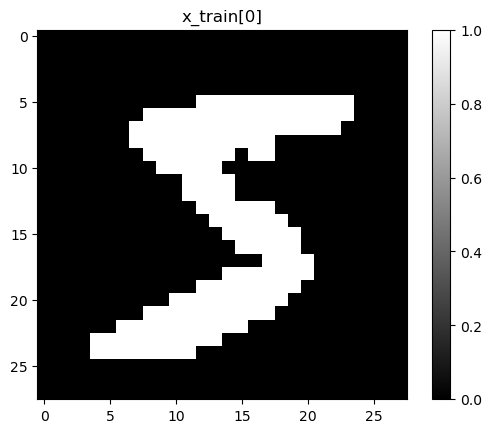

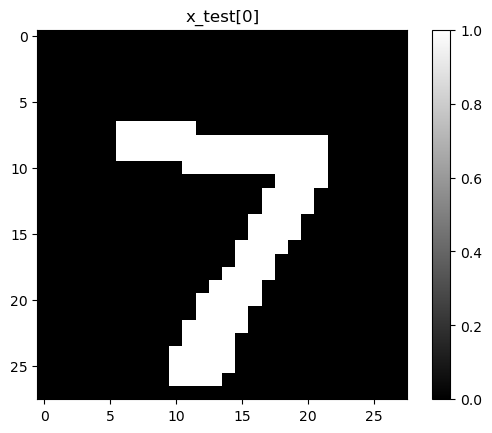

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Convert all pixel values greater than 0 to 1 (binary images)
x_train[x_train > 0] = 1
x_test[x_test > 0] = 1

# Function to visualize the images
def visualize_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Print the content of x_train[0] and x_test[0]
print("x_train[0] content:\n", x_train[0])
print("\nx_test[0] content:\n", x_test[0])

# Visualize the images
visualize_image(x_train[0], title="x_train[0]")
visualize_image(x_test[0], title="x_test[0]")

## Create Input Layer of Neural Network and Reshape Data to Match Input Layer Shape

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 1: Flatten the 28x28 images into 1D arrays (784,)
x_train = x_train.reshape(-1, 28*28)  # Flatten each image to a 784-length vector
x_test = x_test.reshape(-1, 28*28)

# Step 2: Reshape to have a single "channel" (for 1D CNN to work)
x_train = x_train.reshape(-1, 784, 1)  # (batch_size, 784, 1)
x_test = x_test.reshape(-1, 784, 1)

# Step 3: Define a simple 1D CNN model
input_layer = layers.Input(shape=(784, 1))

print( f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print( f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print( f"input layer shape: {input_layer.shape}")

x_train shape: (60000, 784, 1), x_test shape: (10000, 784, 1)
y_train shape: (60000,), y_test shape: (10000,)
input layer shape: (None, 784, 1)


### why using -1 parameter in reshape function

In [18]:
import numpy as np

data = np.array( np.random.randint(0, 11, (3, 5, 5)))
print( f"before reshape:\n{data.shape}")
print( data )
data = data.reshape(-1, 25)
print( f"after reshape:\n{data.shape}")
print( data )

before reshape:
(3, 5, 5)
[[[ 0  6  3  2  7]
  [ 0  8  0  2  1]
  [10  8  0  5  5]
  [ 3  5 10  4  5]
  [10  6  4  4  0]]

 [[ 7  8  2  3  5]
  [ 1  1  5  1  5]
  [ 5  2  6 10  3]
  [ 3  2  9  4  0]
  [ 7  7  0  4  2]]

 [[ 0  9  1  0  6]
  [ 3  4  0  2  6]
  [10  4  3  6  7]
  [ 4  7  3  8  6]
  [ 4  5  6  9 10]]]
after reshape:
(3, 25)
[[ 0  6  3  2  7  0  8  0  2  1 10  8  0  5  5  3  5 10  4  5 10  6  4  4
   0]
 [ 7  8  2  3  5  1  1  5  1  5  5  2  6 10  3  3  2  9  4  0  7  7  0  4
   2]
 [ 0  9  1  0  6  3  4  0  2  6 10  4  3  6  7  4  7  3  8  6  4  5  6  9
  10]]


### Create NN model

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 782, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 391, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12512)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,601,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,603,082 (6.12 MB)

 Trainable params: 1,603,082 (6.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 - 11s - 7ms/step - accuracy: 0.9346 - loss: 0.2146 - val_accuracy: 0.9704 - val_loss: 0.1045
Epoch 2/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9713 - loss: 0.0915 - val_accuracy: 0.9687 - val_loss: 0.1097
Epoch 3/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9802 - loss: 0.0595 - val_accuracy: 0.9745 - val_loss: 0.0856
Epoch 4/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.9722 - val_loss: 0.0978
Epoch 5/5
1500/1500 - 10s - 7ms/step - accuracy: 0.9908 - loss: 0.0275 - val_accuracy: 0.9773 - val_loss: 0.0892
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.1012
Test accuracy: 0.9764000177383423
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1200x1200 with 0 Axes>

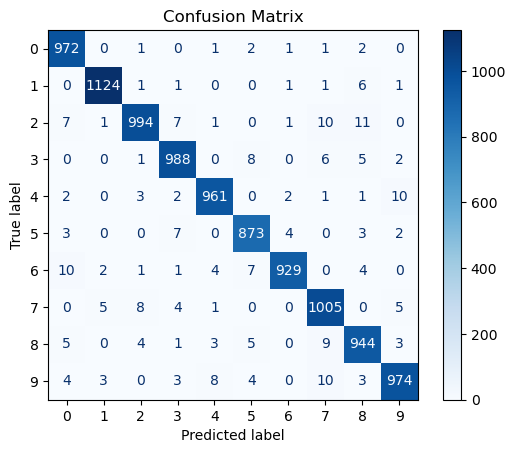


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 1: Flatten the 28x28 images into 1D arrays (784,)
x_train = x_train.reshape(-1, 28*28)  # Flatten each image to a 784-length vector
x_test = x_test.reshape(-1, 28*28)

# Step 2: Reshape to have a single "channel" (for 1D CNN to work)
x_train = x_train.reshape(-1, 784, 1)  # (batch_size, 784, 1)
x_test = x_test.reshape(-1, 784, 1)

# Step 3: Define a simple 1D CNN model
input_layer = layers.Input(shape=(784, 1))

# Add a 1D convolutional layer
x = layers.Conv1D(32, kernel_size=3, activation='relu')(input_layer)

# Add a max pooling layer
x = layers.MaxPooling1D(pool_size=2)(x)

# Flatten the output of the convolutional layers
x = layers.Flatten()(x)

# Add a fully connected dense layer
x = layers.Dense(128, activation='relu')(x)

# Add the output layer with 10 units (for 10 classes) and softmax activation
output_layer = layers.Dense(10, activation='softmax')(x)

# Step 4: Create the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Print the summary of the model
model.summary()

# Step 5: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2, verbose=2)

# Step 7: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Step 8: Predictions for the confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 9: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Step 10: Plot the confusion matrix
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 11: Print classification report to get precision, recall, and F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 784, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 782, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 391, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12512)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     1,601,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,603,082 (6.12 MB)

 Trainable params: 1,603,082 (6.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 - 11s - 7ms/step - accuracy: 0.9344 - loss: 0.2156 - val_accuracy: 0.9672 - val_loss: 0.1169
Epoch 2/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9717 - loss: 0.0919 - val_accuracy: 0.9678 - val_loss: 0.1069
Epoch 3/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9807 - loss: 0.0610 - val_accuracy: 0.9743 - val_loss: 0.0884
Epoch 4/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9863 - loss: 0.0413 - val_accuracy: 0.9739 - val_loss: 0.0891
Epoch 5/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9906 - loss: 0.0288 - val_accuracy: 0.9754 - val_loss: 0.0933
Epoch 6/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9929 - loss: 0.0214 - val_accuracy: 0.9769 - val_loss: 0.0990
Epoch 7/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9948 - loss: 0.0154 - val_accuracy: 0.9768 - val_loss: 0.0975
Epoch 8/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9954 - loss: 0.0133 - val_accuracy: 0.9765 - val_loss: 0.1079
Epoch 9/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 

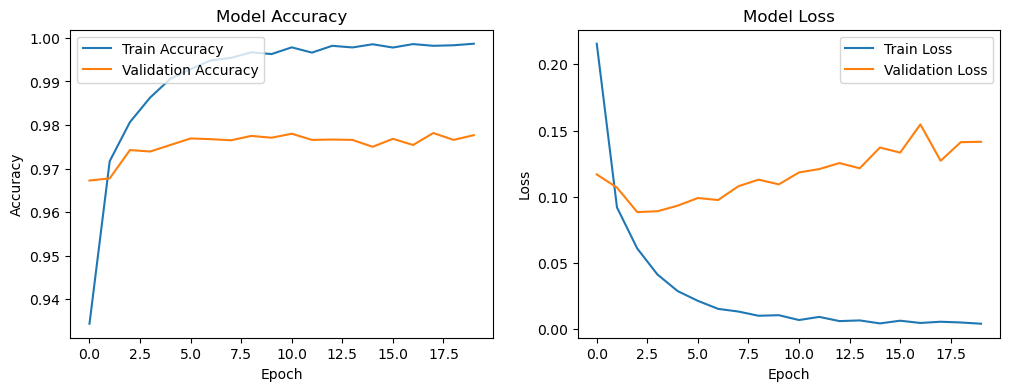

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1200x1200 with 0 Axes>

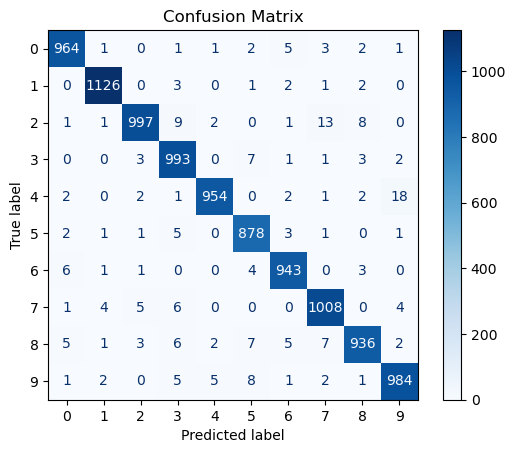


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 1: Flatten the 28x28 images into 1D arrays (784,)
x_train = x_train.reshape(-1, 28*28)  # Flatten each image to a 784-length vector
x_test = x_test.reshape(-1, 28*28)

# Step 2: Reshape to have a single "channel" (for 1D CNN to work)
x_train = x_train.reshape(-1, 784, 1)  # (batch_size, 784, 1)
x_test = x_test.reshape(-1, 784, 1)

# Step 3: Define a simple 1D CNN model
input_layer = layers.Input(shape=(784, 1))

# Add a 1D convolutional layer
x = layers.Conv1D(32, kernel_size=3, activation='relu')(input_layer)

# Add a max pooling layer
x = layers.MaxPooling1D(pool_size=2)(x)

# Flatten the output of the convolutional layers
x = layers.Flatten()(x)

# Add a fully connected dense layer
x = layers.Dense(128, activation='relu')(x)

# Add the output layer with 10 units (for 10 classes) and softmax activation
output_layer = layers.Dense(10, activation='softmax')(x)

# Step 4: Create the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Print the summary of the model
model.summary()

# Step 5: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model and save the training history
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2, verbose=2)

# Step 7: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Step 8: Plot the training history (loss and accuracy)
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.show()

# Call the function to plot the history
plot_history(history)

# Step 9: Predictions for the confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 10: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Step 11: Plot the confusion matrix
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 12: Print classification report to get precision, recall, and F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))
